In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# Initial Thoughs & Hypothesis
## Are gene expressions in controls with dose D2 different over the time?
### Take g-0 for example: 
**Is the g-0 expression in control with dose 2 different for 24 vs. 48 hours?**<br>
$H_0$: The average g-0 expressions in control with dose 2 are the same for 24 vs. 48 hours.<br>
$H_a$: The average g-0 expressions in control with dose 2 are significantly different for 24 vs. 48 hours.

In [2]:
# Read csv files to dataframe

df_ctrl_d2_24 = pd.read_csv('df_ctrl_d2_24.csv', index_col=0)
df_ctrl_d2_48 = pd.read_csv('df_ctrl_d2_48.csv', index_col=0)
df_ctrl_d2_72 = pd.read_csv('df_ctrl_d2_72.csv', index_col=0)

In [3]:
# Test the assumption of equal variance by Levene's test

stats.levene(df_ctrl_d2_24['g-0'], df_ctrl_d2_48['g-0'])

# since p > 0.05, we can say that the variances are not significantly different
# set the argument in ttest_ind of equal_var to be true

LeveneResult(statistic=3.0660366167455915, pvalue=0.0804484376816337)

In [5]:
df_ctrl_d2_24['g-0'].size, df_ctrl_d2_48['g-0'].size

(305, 305)

Text(0.5, 1.0, 'Compare g-0 expression at 24 and 48 hrs')

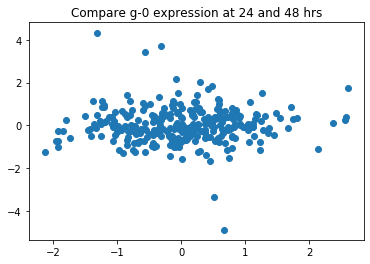

In [11]:
# Scatter plot the 2 g-0 data. 

plt.scatter(x=df_ctrl_d2_24['g-0'], y=df_ctrl_d2_48['g-0'])
plt.title("Compare g-0 expression at 24 and 48 hrs")

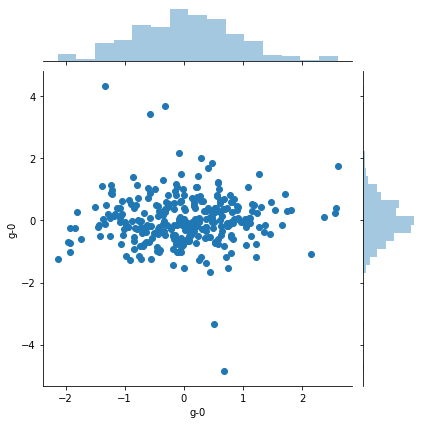

In [15]:
# Jointplot the 2 g-0 data

sns.jointplot(x=df_ctrl_d2_24['g-0'], y=df_ctrl_d2_48['g-0'])
# plt.title("Compare g-0 expression at 24 and 48 hrs")

In [16]:
# variances are equal
# t-test

stats.ttest_ind(df_ctrl_d2_24['g-0'], df_ctrl_d2_48['g-0'], equal_var=True)

# Since p > 0.05, it is fail to reject the H0.

Ttest_indResult(statistic=-0.03571110005597076, pvalue=0.9715244406896814)

In [22]:
# Iterate the rest of the gene expression data

output = {}

for i in range(0, 772):
    gene = 'g-' + str(i)
    s, p = stats.levene(df_ctrl_d2_24[gene], df_ctrl_d2_48[gene])
    if p < 0.05:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_24[gene], df_ctrl_d2_48[gene], equal_var=False)
    else:
        s1, p1 = stats.ttest_ind(df_ctrl_d2_24[gene], df_ctrl_d2_48[gene], equal_var=True)
    output[gene] = p1

ctrl_24_48 = pd.Series(output)
ctrl_24_48.size

772

In [23]:
# Count how many genes are expressed differently for control group treated with does D2 
# at 24 hours vs. 48 hours
# set the alpha = 0.05

mask = (ctrl_24_48 < 0.05)
mask.sum()

290

**Takeaways**
- Do I need to address the outliers in gene expression data?
- How to plot 2 numerical variables from two datasets?
- The average g-0 expressions in control with dose 2 are the same for 24 vs. 48 hours.
- 290 gene expressions in control with dose 2 are significantly different at 24 hours vs. 48 hours.
    - caused by controls
    - caused by outliers
    - natural process, caused by cell proliferation